# Covid-19 New vs Total per Country (aggregated by week)

*Inspired by Minute Physics (https://www.youtube.com/watch?v=54XLXg4fYsc) and Aatish Bhatia (https://aatishb.com/covidtrends/)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [4]:
days = len(df.columns) - 4
weeks = days // 7
print(days, weeks)

91 13


In [5]:
df_country = df.groupby('Country/Region').sum().reset_index()
df_country = df_country.loc[:, df_country.columns != 'Province/State']
df_country = df_country.loc[:, df_country.columns != 'Lat']
df_country = df_country.loc[:, df_country.columns != 'Long']
df_country

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,Albania,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,Algeria,0,0,0,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,Andorra,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,290,308,308,374,374,402,418,437,449,466
181,Western Sahara,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
182,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
183,Zambia,0,0,0,0,0,0,0,0,0,...,43,45,45,48,48,52,57,61,65,70


In [6]:
df_country['new_'+df_country.columns[1]] = 0
for i in range(2,days+1):
    new = df_country.iloc[:,i] - df_country.iloc[:,i-1]
    df_country['new_'+df_country.columns[i]] = new
df_country

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,new_4/12/20,new_4/13/20,new_4/14/20,new_4/15/20,new_4/16/20,new_4/17/20,new_4/18/20,new_4/19/20,new_4/20/20,new_4/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,52,58,49,70,56,66,27,63,30,66
1,Albania,0,0,0,0,0,0,0,0,0,...,13,21,8,19,24,21,9,14,22,25
2,Algeria,0,0,0,0,0,0,0,0,0,...,89,69,87,90,108,150,116,95,89,93
3,Andorra,0,0,0,0,0,0,0,0,0,...,37,8,13,14,0,23,8,9,4,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,22,18,0,66,0,28,16,19,12,17
181,Western Sahara,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
182,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,Zambia,0,0,0,0,0,0,0,0,0,...,3,2,0,3,0,4,5,4,4,5


In [7]:
df_country_week = df_country[df_country.columns[:1]]
for i in range(7, 7 + 7*weeks, 7):
    df_country_week = df_country_week.join(pd.DataFrame(df_country.iloc[:,i]))

for i in range(days+7, len(df_country.columns), 7):
    df_country_week = df_country_week.join(pd.DataFrame(df_country.iloc[:,i]))
    
df_country_week

,Country/Region,1/28/20,2/4/20,2/11/20,2/18/20,2/25/20,3/3/20,3/10/20,3/17/20,3/24/20,...,new_2/18/20,new_2/25/20,new_3/3/20,new_3/10/20,new_3/17/20,new_3/24/20,new_3/31/20,new_4/7/20,new_4/14/20,new_4/21/20
0,Afghanistan,0,0,0,0,1,1,5,22,74,...,0,0,0,1,1,34,4,56,49,66
1,Albania,0,0,0,0,0,0,10,55,123,...,0,0,0,8,4,19,20,6,8,25
2,Algeria,0,0,0,0,1,5,20,60,264,...,0,1,2,0,6,34,132,45,87,93
3,Andorra,0,0,0,0,0,1,1,39,164,...,0,0,0,0,37,31,6,20,13,0
4,Angola,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,0,0,0,0,0,0,26,39,59,...,0,0,0,7,1,0,3,7,0,17
181,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,Zambia,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,5


In [8]:
print(list(df_country_week.columns))

['Country/Region', '1/28/20', '2/4/20', '2/11/20', '2/18/20', '2/25/20', '3/3/20', '3/10/20', '3/17/20', '3/24/20', '3/31/20', '4/7/20', '4/14/20', '4/21/20', 'new_1/28/20', 'new_2/4/20', 'new_2/11/20', 'new_2/18/20', 'new_2/25/20', 'new_3/3/20', 'new_3/10/20', 'new_3/17/20', 'new_3/24/20', 'new_3/31/20', 'new_4/7/20', 'new_4/14/20', 'new_4/21/20']


In [9]:
#df_country_week.loc[df_country["Country/Region"] == "United Kingdom"]

In [10]:
#df_country_week.to_csv("time_series_covid19_confirmed_global_newweek.csv")

In [11]:
print(list(df_country_week.iloc[:,0]))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

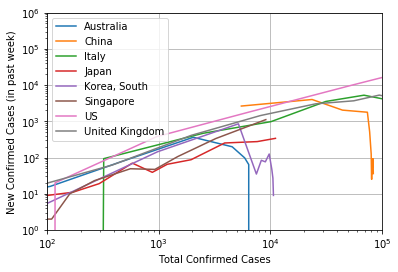

In [12]:
#plt.figure(figsize=(20,10))
for row in range(len(df_country_week)):
    if df_country_week.iloc[row][0] in ["Singapore", "China", "Korea, South", "US", "United Kingdom", "Japan", "Australia", "Italy"]:
        x = df_country_week.iloc[row][1:weeks+1]
        y = df_country_week.iloc[row][weeks+1:]
        plt.plot(x,y, label=df_country_week.iloc[row][0])

plt.grid()
plt.xlim(10**2,10**5)
plt.ylim(1,10**6)
plt.xlabel("Total Confirmed Cases")
plt.ylabel("New Confirmed Cases (in past week)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
